Dataset:

* n_samples=200: The dataset will contain 200 samples.
* noise=0.2: Gaussian noise with a standard deviation of 0.2 is added to the data points, making the dataset more realistic and challenging by introducing some overlap between the classes.
* random_state=42: The dataset generation will be reproducible with the same random state, ensuring that the same dataset is generated each time the code is run.

Realworld example:
Consider a medical diagnosis scenario where patients need to be classified into two categories based on two key health metrics. The two categories might represent:

* Category A: Patients with a high risk of developing a certain disease.
* Category B: Patients with a low risk of developing the disease.

The features used for classification could be:

* Feature 1: Level of a specific biomarker in the blood.
* Feature 2: Age of the patient.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Generate a non-linear dataset
X, y = make_moons(n_samples=200, noise=0.2, random_state=42)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the parameter grid for 'C' and 'gamma'
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'gamma': [0.01, 0.1, 1, 10],
    'kernel': ['rbf']
}

# Initialize the GridSearchCV with SVM and parameter grid
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=2)
grid.fit(X_train, y_train)

# Print the best parameters and the corresponding score
print(f"Best Parameters: {grid.best_params_}")
print(f"Best Cross-validation Score: {grid.best_score_}")

# Test the best model on the test set
y_pred = grid.predict(X_test)
print(f"Test Set Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

# Print the confusion matrix
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

# Create a mesh grid for plotting decision boundaries
xx, yy = np.meshgrid(np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 100),
                     np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, 100))

# Predict the function value for the whole grid
Z = grid.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)


Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END .....................C=0.01, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.01, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.01, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.01, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.01, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.01, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.01, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.01, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.01, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.01, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ........................C=0.01, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ........................C=0.01, gamma=1

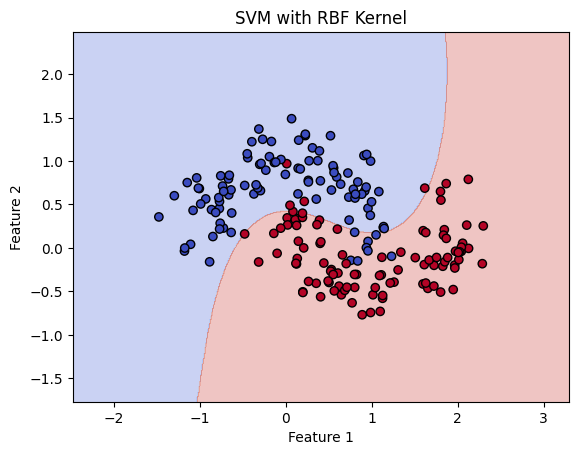

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

# Generate a non-linear dataset
X, y = make_moons(n_samples=200, noise=0.2, random_state=42)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train an SVM model with the RBF kernel
model = SVC(kernel='rbf', C=1, gamma=0.5)
model.fit(X_train, y_train)

# Function to plot decision boundaries
def plot_decision_boundaries(X, y, model):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.coolwarm)
    plt.title("SVM with RBF Kernel")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

# Plot the decision boundaries
plot_decision_boundaries(X, y, model)

* C = 0.01, gamma = 0.01:
Very Low C and Very Low gamma: The decision boundary is very simple and smooth. The SVM allows for many misclassifications to prioritize a very wide margin, and the RBF kernel captures very basic relationships.
* C = 0.01, gamma = 0.1:
Very Low C and Low gamma: The decision boundary is still simple and smooth. The SVM allows for many misclassifications but is slightly more sensitive to the data, capturing slightly more complex relationships.
* C = 0.01, gamma = 1:
Very Low C and Medium gamma: The decision boundary is more complex but still relatively smooth. The SVM allows for many misclassifications but is more sensitive to nearby training examples, capturing more intricate relationships.
* C = 0.01, gamma = 10:
Very Low C and High gamma: The decision boundary is highly complex and potentially overfitting. The SVM allows for many misclassifications but is very sensitive to nearby training examples, leading to intricate decision regions.
* C = 0.1, gamma = 0.01:
Low C and Very Low gamma: The decision boundary is relatively simple and smooth. The SVM allows for some misclassifications to prioritize a wider margin, capturing very basic relationships.
* C = 0.1, gamma = 0.1:
Low C and Low gamma: The decision boundary is still relatively simple and smooth. The SVM allows for some misclassifications but is slightly more sensitive to the data, capturing slightly more complex relationships.
* C = 0.1, gamma = 1:
Low C and Medium gamma: The decision boundary is more complex but still relatively smooth. The SVM allows for some misclassifications but is more sensitive to nearby training examples, capturing more intricate relationships.
* C = 0.1, gamma = 10:
Low C and High gamma: The decision boundary is highly complex and potentially overfitting. The SVM allows for some misclassifications but is very sensitive to nearby training examples, leading to intricate decision regions.
* C = 1, gamma = 0.01:
Medium C and Very Low gamma: The decision boundary is more complex than in the first case due to the higher C value. The SVM tries to minimize misclassifications while maintaining a relatively smooth boundary, capturing very basic relationships.
* C = 1, gamma = 0.1:
Medium C and Low gamma: The decision boundary is more complex and smooth. The SVM tries to minimize misclassifications while being slightly more sensitive to the data, capturing slightly more complex relationships.
* C = 1, gamma = 1:
Medium C and Medium gamma: The decision boundary is more complex than in the previous cases. The SVM balances the margin and misclassification penalty with moderate sensitivity to nearby training examples, capturing more intricate relationships.
* C = 1, gamma = 10:
Medium C and High gamma: The decision boundary is highly complex and potentially overfitting. The SVM tries to minimize misclassifications while being very sensitive to nearby training examples, leading to intricate decision regions.
* C = 10, gamma = 0.01:
High C and Very Low gamma: The decision boundary is complex and potentially overfitting. The SVM prioritizes minimizing misclassifications, leading to a less smooth boundary while capturing very basic relationships.
* C = 10, gamma = 0.1:
High C and Low gamma: The decision boundary is complex and smooth. The SVM strongly penalizes misclassifications while being slightly more sensitive to the data, capturing slightly more complex relationships.
* C = 10, gamma = 1:
High C and Medium gamma: The decision boundary is highly complex and likely overfitting. The SVM strongly penalizes misclassifications and is moderately sensitive to nearby training examples, capturing more intricate relationships.
* C = 10, gamma = 10:
High C and High gamma: The decision boundary is extremely complex and highly overfitting. The SVM strongly penalizes misclassifications and is very sensitive to nearby training examples, leading to a highly intricate and potentially non-generalizable decision boundary.

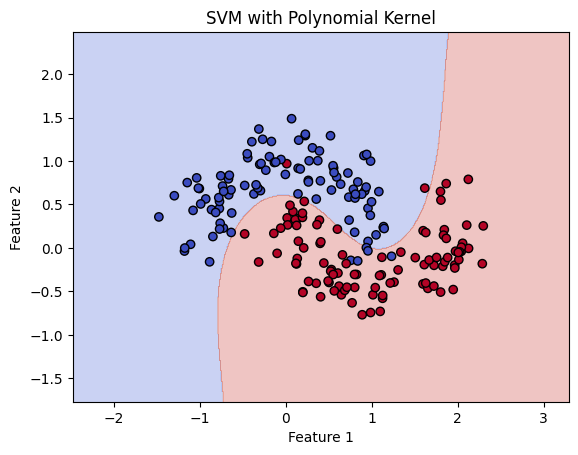

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

# Generate a non-linear dataset
X, y = make_moons(n_samples=200, noise=0.2, random_state=42)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train an SVM model with the Polynomial kernel
model = SVC(kernel='poly', degree=3, gamma='scale', coef0=1, C=1)
model.fit(X_train, y_train)

# Function to plot decision boundaries
def plot_decision_boundaries(X, y, model):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.coolwarm)
    plt.title("SVM with Polynomial Kernel")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

# Plot the decision boundaries
plot_decision_boundaries(X, y, model)

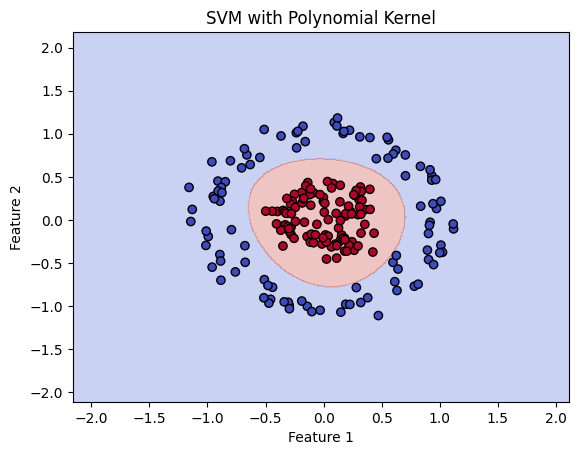

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

# Generate a circular dataset
X, y = make_circles(n_samples=200, noise=0.1, factor=0.3, random_state=42)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train an SVM model with the Polynomial kernel
model = SVC(kernel='poly', degree=3, gamma='scale', coef0=1, C=1)
model.fit(X_train, y_train)

# Function to plot decision boundaries
def plot_decision_boundaries(X, y, model):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.coolwarm)
    plt.title("SVM with Polynomial Kernel")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

# Plot the decision boundaries
plot_decision_boundaries(X, y, model)

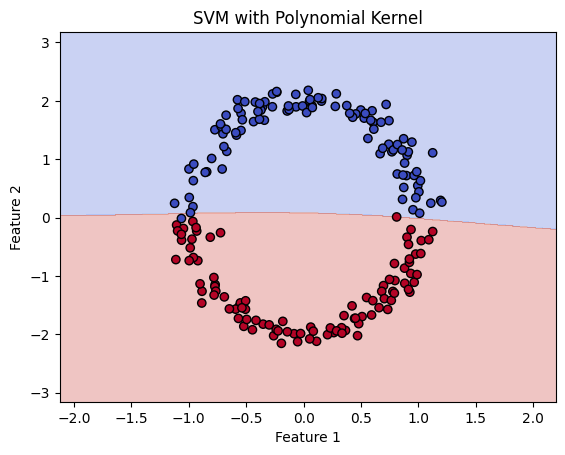

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

# Generate an elliptical dataset
def generate_elliptical_data(n_samples=200, noise=0.1, random_state=42):
    np.random.seed(random_state)
    t = 2 * np.pi * np.random.rand(n_samples)
    x = np.cos(t) + noise * np.random.randn(n_samples)
    y = 2 * np.sin(t) + noise * np.random.randn(n_samples)
    labels = np.where(t < np.pi, 0, 1)
    return np.c_[x, y], labels

X, y = generate_elliptical_data(n_samples=200, noise=0.1, random_state=42)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train an SVM model with the Polynomial kernel
model = SVC(kernel='poly', degree=3, gamma='scale', coef0=1, C=1)
model.fit(X_train, y_train)

# Function to plot decision boundaries
def plot_decision_boundaries(X, y, model):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.coolwarm)
    plt.title("SVM with Polynomial Kernel")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

# Plot the decision boundaries
plot_decision_boundaries(X, y, model)

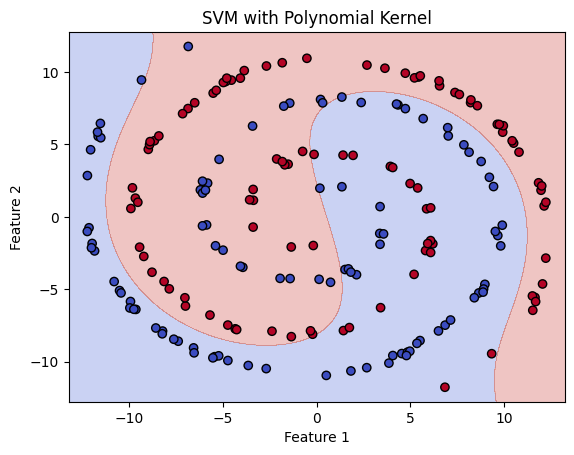

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

# Generate a spiral dataset
def generate_spiral_data(n_samples, noise=0.5):
    n = np.sqrt(np.random.rand(n_samples, 1)) * 780 * (2 * np.pi) / 360
    d1x = -np.cos(n) * n + np.random.rand(n_samples, 1) * noise
    d1y = np.sin(n) * n + np.random.rand(n_samples, 1) * noise
    X = np.vstack((np.hstack((d1x, d1y)), np.hstack((-d1x, -d1y))))
    y = np.hstack((np.zeros(n_samples), np.ones(n_samples)))
    return X, y

X, y = generate_spiral_data(n_samples=100, noise=0.5)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train an SVM model with the Polynomial kernel
model = SVC(kernel='poly', degree=3, gamma='scale', coef0=1, C=1)
model.fit(X_train, y_train)

# Function to plot decision boundaries
def plot_decision_boundaries(X, y, model):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.coolwarm)
    plt.title("SVM with Polynomial Kernel")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

# Plot the decision boundaries
plot_decision_boundaries(X, y, model)